<a href="https://colab.research.google.com/github/the-nameshifter/Artificial-Neural-Networks/blob/main/ANN_To_predict_sales_using_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Problem Statement
---


*   For an Ice Cream business we will create a model that could predict the daily revenue in dollars based on the outside air temperature (Degres Celsius).

*   Dataset 
- Input(X): Outside Air Temperature
- Output(y): Overall daily revenue generated in dollars












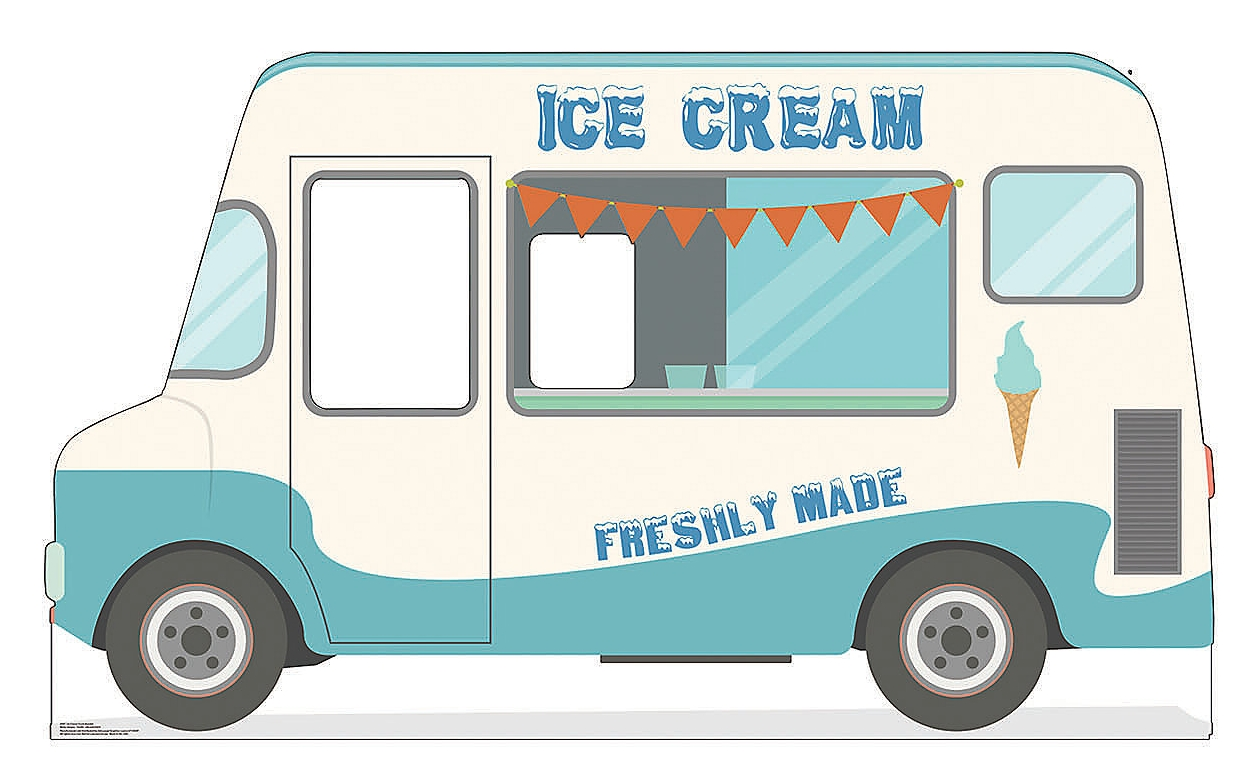

In [1]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
Dataset_df = pd.read_csv('/content/SalesData.csv')

In [3]:
Dataset_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
Dataset_df.head(7)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
5,14.352514,367.940744
6,13.707780,308.894518


In [5]:
Dataset_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
Dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


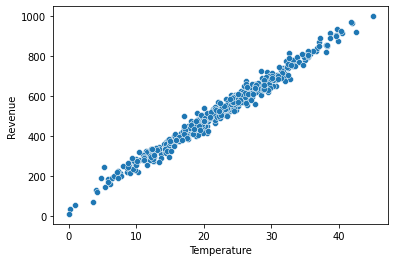

In [7]:
sns.scatterplot(Dataset_df['Temperature'], Dataset_df['Revenue'])



*   Creating testing and training dataset



In [8]:
X_train = Dataset_df['Temperature']
Y_train = Dataset_df['Revenue']

In [9]:
X_train.shape

(500,)

In [10]:
Y_train.shape

(500,)





*   Build and train the model



In [11]:
 model = tf.keras.Sequential()
 model.add(tf.keras.layers.Dense(units = 10, input_shape = [1]))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [14]:
epochs_hist = model.fit(X_train, Y_train, epochs= 1000)

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 281011.5625
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 241287.0312
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 205599.0781
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 174694.6250
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 146392.0312
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 122339.9453
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 101604.1172
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 83465.3047
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 68313.0547
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 55378.8789
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 44486.2031
Epoch 12/1000
16/16 [==============================] - 0




> Evaluating the model



In [15]:
epochs_hist.history.keys()

dict_keys(['loss'])

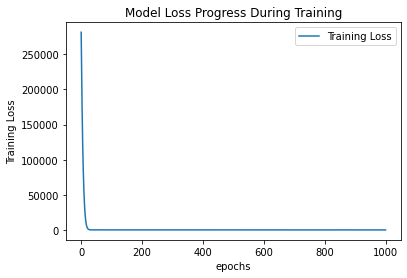

In [16]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [17]:
model.get_weights()

[array([[21.498243, 21.498241, 21.498241, 21.498241, 21.498241, 21.498241,
         21.498243, 21.498241, 21.498241, 21.49824 ]], dtype=float32),
 array([44.872314, 44.872314, 44.872322, 44.872314, 44.872345, 44.87232 ,
        44.87229 , 44.872322, 44.87232 , 44.87233 ], dtype=float32)]



> Using the trained model to perform predictions 



In [18]:
Temp = 5
Revenue = model.predict([Temp])
print('Revenue Predictions Using Trained ANN =', Revenue)

Revenue Predictions Using Trained ANN = [[152.36353 152.36353 152.36353 152.36353 152.36356 152.36353 152.36351
  152.36353 152.36353 152.36353]]


Text(0, 0.5, 'Revenue [Dollars]')

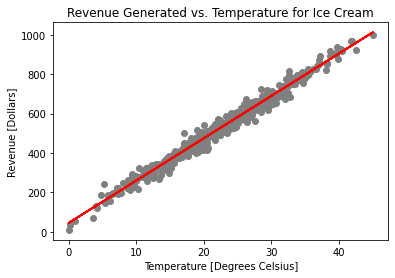

In [19]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature for Ice Cream')
plt.xlabel('Temperature [Degrees Celsius]')
plt.ylabel('Revenue [Dollars]')




> Confirm using Sklearn



In [20]:
X_train

0      24.566884
1      26.005191
2      27.790554
3      20.595335
4      11.503498
         ...    
495    22.274899
496    32.893092
497    12.588157
498    22.362402
499    28.957736
Name: Temperature, Length: 500, dtype: float64

In [28]:
X_train.shape

(500, 1)

In [21]:
X_train = X_train.values

In [22]:
X_train

array([24.56688442, 26.00519115, 27.79055388, 20.59533505, 11.50349764,
       14.35251388, 13.70777988, 30.83398474,  0.97686999, 31.66946458,
       11.45525338,  3.66466958, 18.81182403, 13.62450892, 39.53990899,
       18.48314099, 25.93537514, 42.51528041, 29.58948056, 21.77594799,
       25.45783637, 15.21456942, 22.61931574, 16.25872074, 23.88172478,
       18.97830025, 15.6614643 , 29.18504465, 19.02461092, 35.12015142,
       24.18393726, 15.23119012,  8.79095281, 18.23322784, 35.62892497,
       37.05754246, 22.28455032, 17.51707397, 31.7379196 , 17.04973761,
       23.0034888 ,  8.75555394, 18.77535808, 14.10966102, 18.63391286,
       15.67648661, 20.94791347, 30.6353071 , 20.47359412, 31.22898848,
        6.39383463, 27.18581031, 28.63373276, 27.99922248, 10.32638937,
       27.31281141, 33.23567229, 36.56911506, 12.46293731, 14.37969698,
       16.30255473, 11.56964367, 33.55141872,  3.98652317, 20.51163741,
        6.5425144 , 19.81753939, 11.69453767, 21.4881766 , 18.77

In [30]:
X_train.shape

(500, 1)

In [24]:
X_train = X_train.reshape(-1,1)

In [26]:
X_train

array([[24.56688442],
       [26.00519115],
       [27.79055388],
       [20.59533505],
       [11.50349764],
       [14.35251388],
       [13.70777988],
       [30.83398474],
       [ 0.97686999],
       [31.66946458],
       [11.45525338],
       [ 3.66466958],
       [18.81182403],
       [13.62450892],
       [39.53990899],
       [18.48314099],
       [25.93537514],
       [42.51528041],
       [29.58948056],
       [21.77594799],
       [25.45783637],
       [15.21456942],
       [22.61931574],
       [16.25872074],
       [23.88172478],
       [18.97830025],
       [15.6614643 ],
       [29.18504465],
       [19.02461092],
       [35.12015142],
       [24.18393726],
       [15.23119012],
       [ 8.79095281],
       [18.23322784],
       [35.62892497],
       [37.05754246],
       [22.28455032],
       [17.51707397],
       [31.7379196 ],
       [17.04973761],
       [23.0034888 ],
       [ 8.75555394],
       [18.77535808],
       [14.10966102],
       [18.63391286],
       [15

In [ ]:
X_train.shape

In [ ]:
Y_train = Y_train.values.reshape(-1,1)

In [34]:
Y_train.shape

(500, 1)

In [42]:
from sklearn.linear_model import LinearRegression

Regressor = LinearRegression(fit_intercept = True)
Regressor.fit(X_train, Y_train)

LinearRegression()

In [43]:
print('Linear Model Coeff(m)', Regressor.coef_)
print('Linear Model Coeff(b)', Regressor.intercept_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [44.83126709]


Text(0, 0.5, 'Revenue [Dollars]')

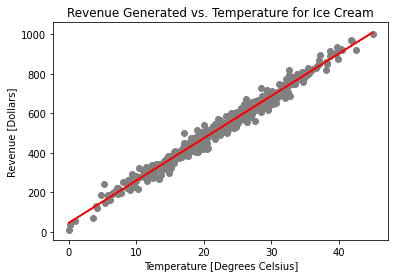

In [44]:
plt.scatter(X_train, Y_train, color = 'gray')
plt.plot(X_train, Regressor.predict(X_train), color = 'red')
plt.title('Revenue Generated vs. Temperature for Ice Cream')
plt.xlabel('Temperature [Degrees Celsius]')
plt.ylabel('Revenue [Dollars]')